In [1]:
import pandas as pd
import os
import splitfolders
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
tf.debugging.set_log_device_placement(True)
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout


tf.debugging.set_log_device_placement(True)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
#Splitting folder into test, train and validation dataset
filepath = r'D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders'
splitfolders.ratio(filepath, output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2521 files [00:01, 1925.55 files/s]


In [3]:
train_path = r'D:\vscode\Sugarcane Leaf Disease Dataset\output\train'
test_path = r'D:\vscode\Sugarcane Leaf Disease Dataset\output\test'
val_path = r'D:\vscode\Sugarcane Leaf Disease Dataset\output\val'

In [4]:
Total_images = glob.glob(r'D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\*\*.jpeg')
print("Total Number of images",len(Total_images))

Total_images = pd.Series(Total_images)

Total_images = pd.Series(Total_images)

Total Number of images 2521


In [5]:
my_list = Total_images
for i, element in enumerate(my_list):
    print(f"Index {i}: {element}")

Index 0: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (1).jpeg
Index 1: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (10).jpeg
Index 2: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (100).jpeg
Index 3: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (101).jpeg
Index 4: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (102).jpeg
Index 5: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (103).jpeg
Index 6: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (104).jpeg
Index 7: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (105).jpeg
Index 8: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (106).jpeg
Index 9: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (107).jpeg
Index 10: D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (108).jpeg
I

In [6]:

img = mpimg.imread(r'D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Healthy\healthy (1).jpeg')
img1 = mpimg.imread(r'D:\vscode\Sugarcane Leaf Disease Dataset\Input_folders\Mosaic\mosaic (1).jpeg')

In [7]:
img.shape, img1.shape

((493, 1040, 3), (1040, 585, 3))

In [8]:
labels = []
for i in os.listdir(train_path):
    labels += [i]
labels

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']

In [9]:
import random
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)

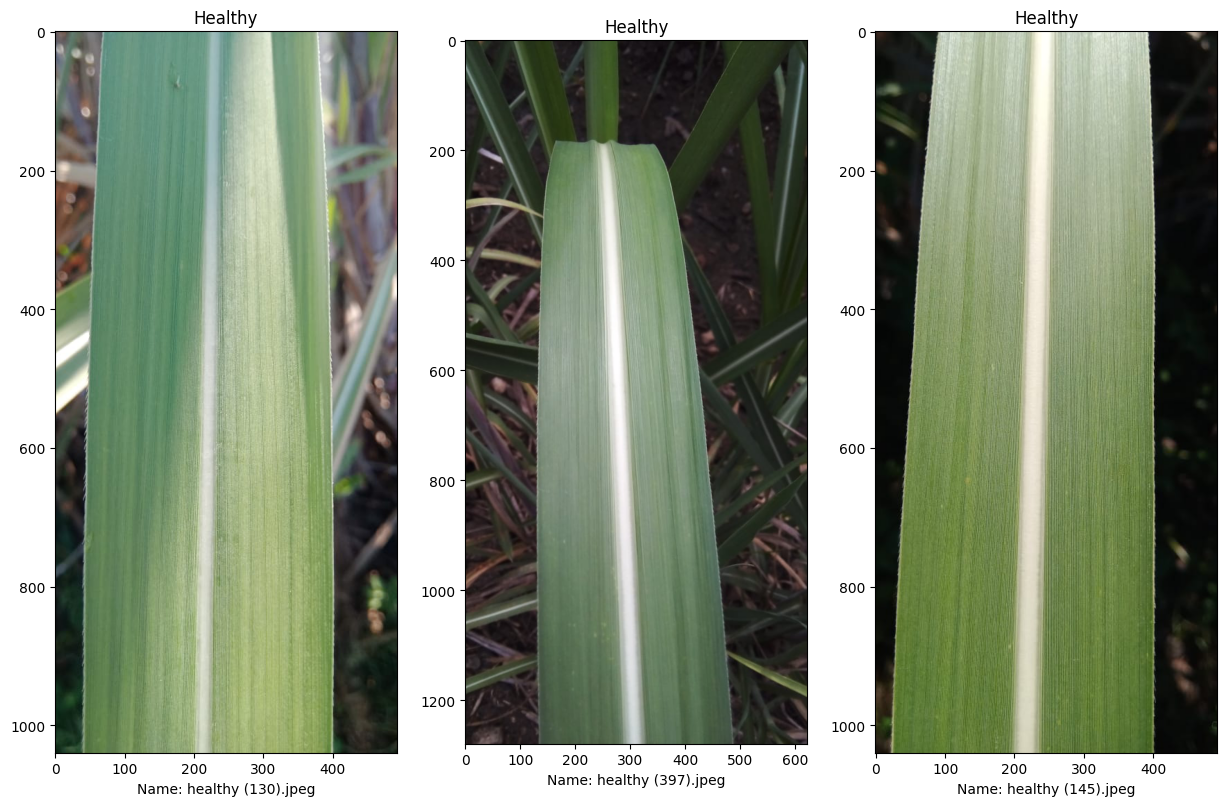

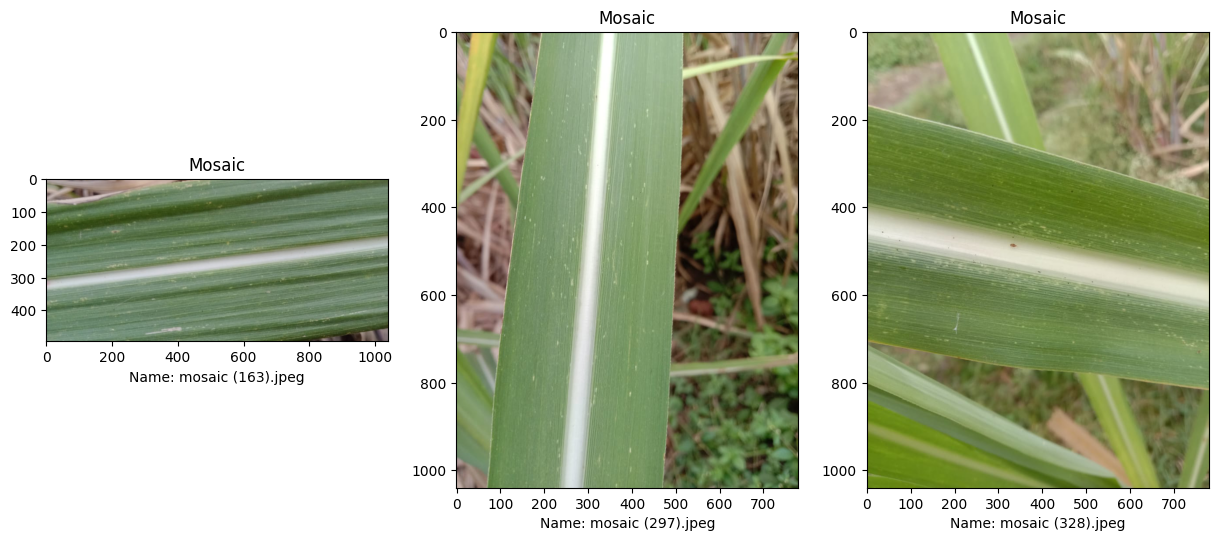

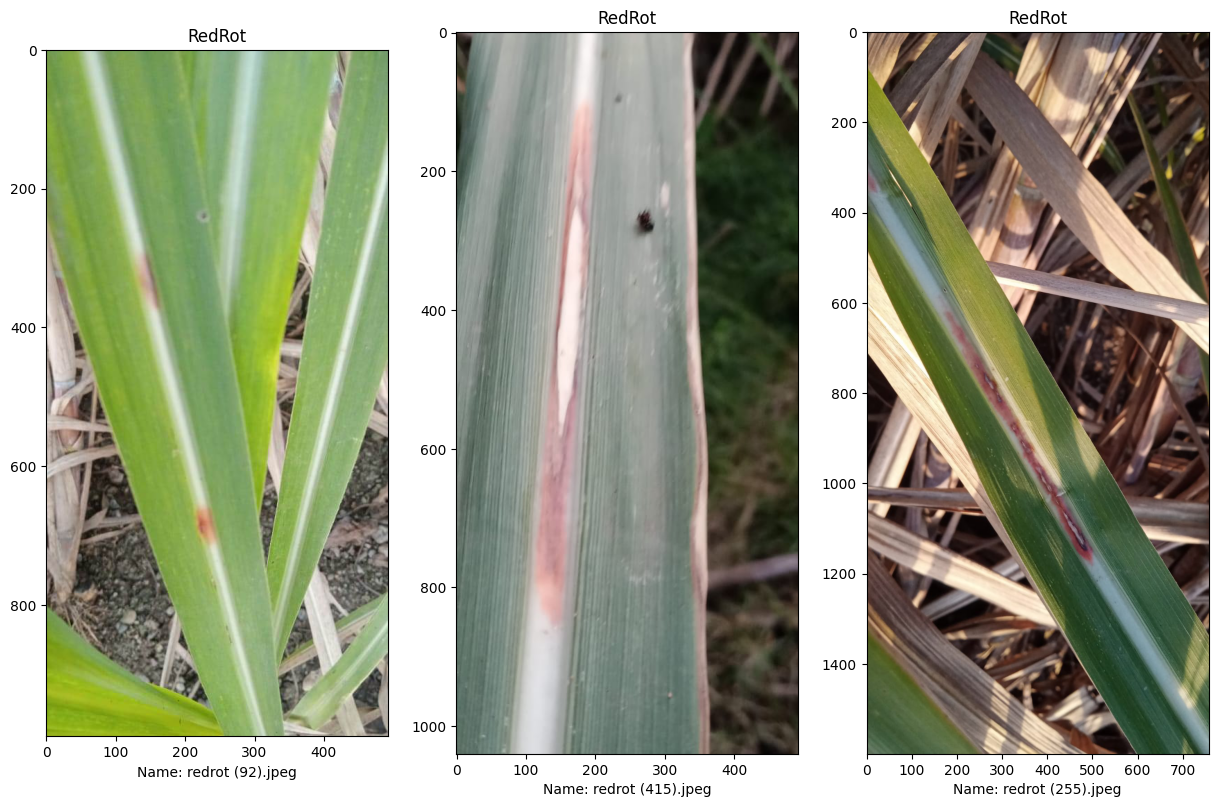

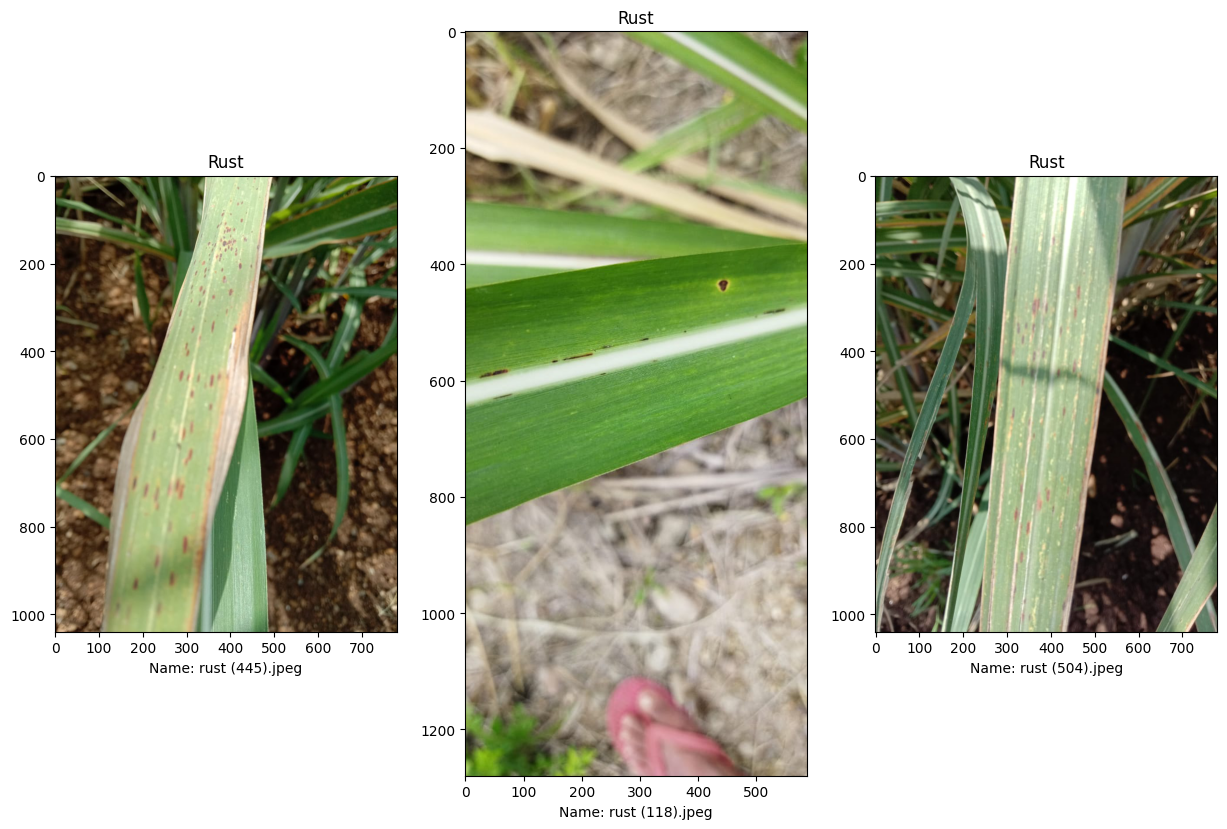

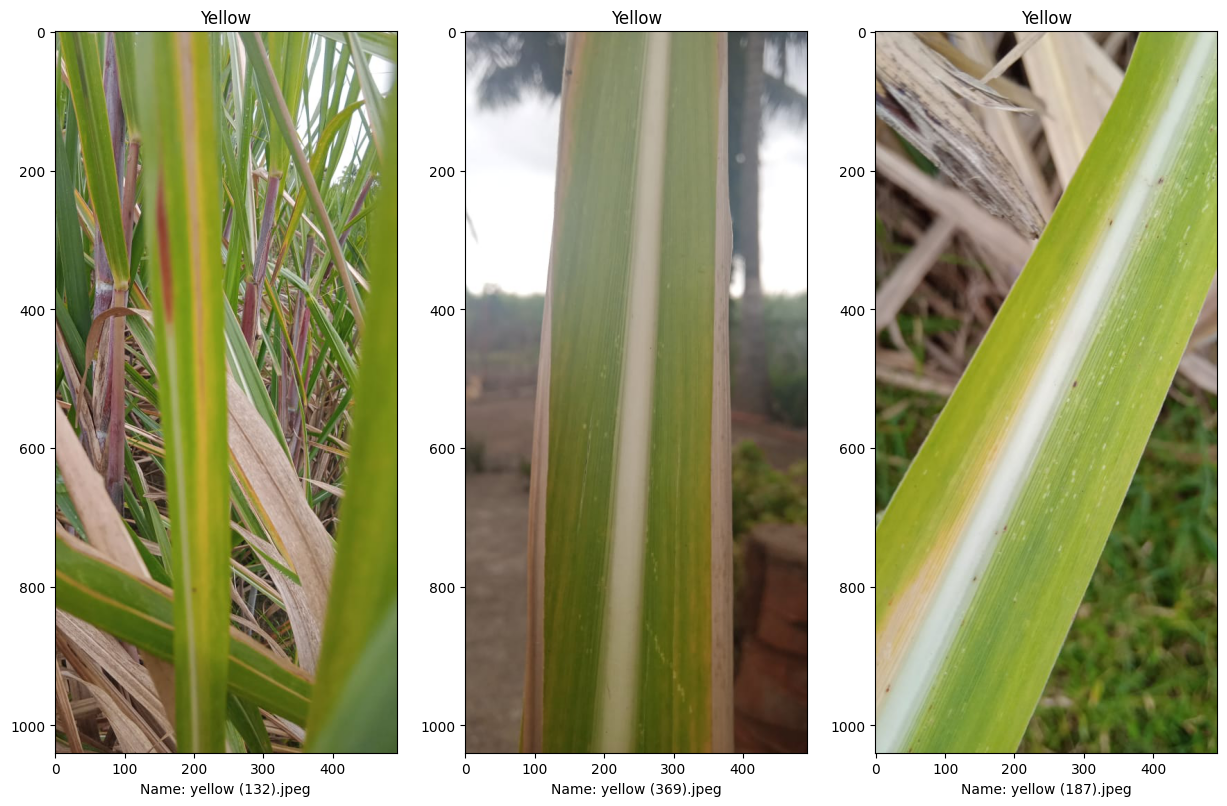

In [10]:
for label in labels:
    load_random_imgs_from_folder(f"{filepath}/{label}",label)

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.5,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [12]:
train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(512,512))

va_generator = test_val_datagen.flow_from_directory(directory=val_path,
                                                      batch_size=16,
                                                      class_mode="categorical",
                                                      target_size=(512,512)
                                                      )

test_generator = test_val_datagen.flow_from_directory(directory = test_path,
                                                    batch_size = 16,
                                                    class_mode = "categorical",
                                                    target_size = (512,512)
                                                    )

Found 2015 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 256 images belonging to 5 classes.


In [13]:
file_path_train = 'D:\\vscode\\Sugarcane Leaf Disease Dataset\\output\\train'
file_path_test = 'D:\\vscode\\Sugarcane Leaf Disease Dataset\\output\\test'


In [14]:
data_train = image_dataset_from_directory(
    file_path_train,
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=0,
    color_mode="rgb",
    image_size=(512,512),
    batch_size=16,
)
data_test = image_dataset_from_directory(
    file_path_test,
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    seed=0,
    color_mode="rgb",
    image_size=(512,512),
    batch_size=16,
)

Found 2015 files belonging to 5 classes.
Using 1612 files for training.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

In [15]:
# small train dataset with BATCH_SIZE*SMALL_DATASET_BATCHES images
train_data_small = data_train.take(5)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0


In [16]:
base_model = VGG16(weights='imagenet',include_top=False,
                   input_shape = (512,512,3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096,activation='relu')(x)
x = Dense(4096,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2096,activation="relu")(x)
predictions = Dense(5, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)
        


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

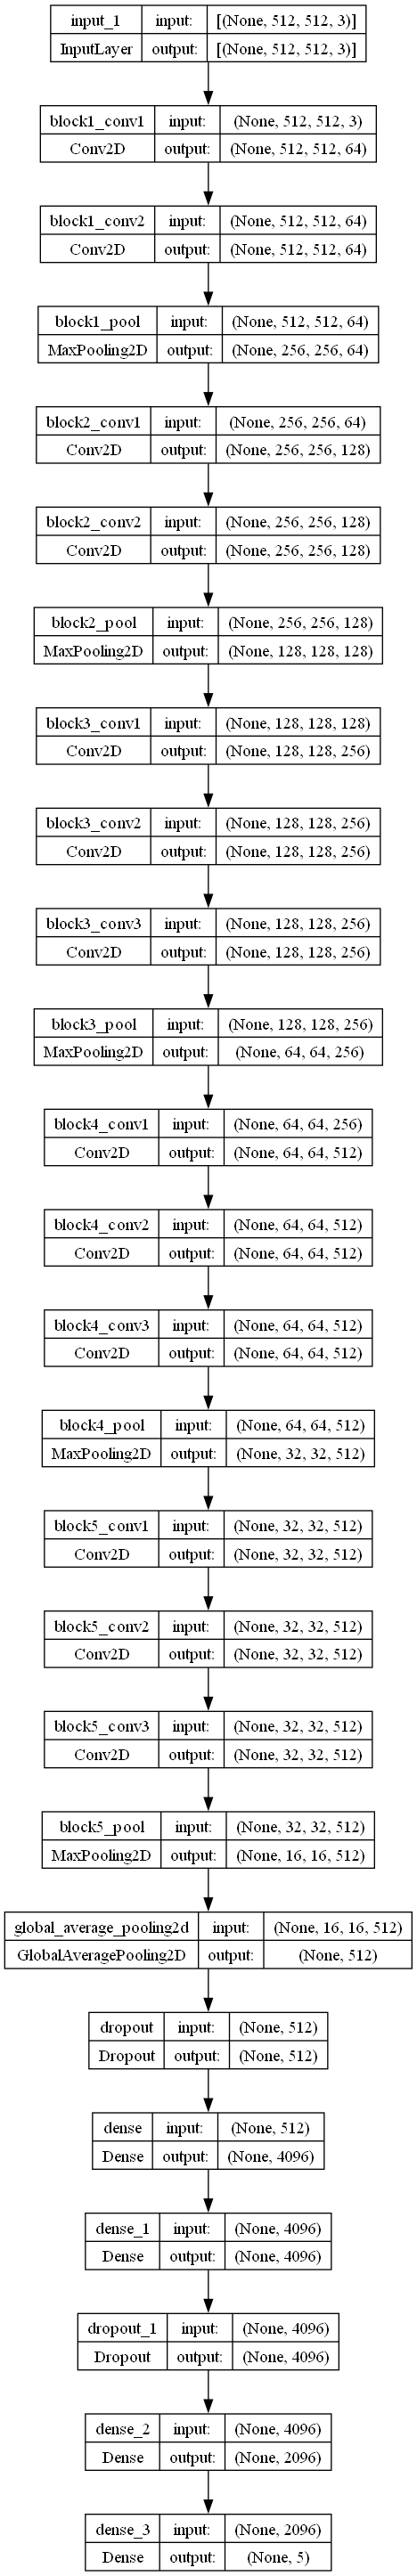

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [19]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

In [20]:
opt = Adam(learning_rate=0.005)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [21]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
history=model.fit(data_train,
                  epochs=50,
                  validation_data=data_test,
                  validation_steps=int(0.1 * len(data_test)),
                  verbose=1,
                  callbacks=callbacks)

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GreaterEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVa

ResourceExhaustedError: Graph execution error:

Detected at node 'model/block1_conv1/Relu' defined at (most recent call last):
    File "c:\Users\skyra\anaconda3\envs\sega\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\skyra\anaconda3\envs\sega\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\skyra\AppData\Local\Temp\ipykernel_4596\437506601.py", line 1, in <module>
      history=model.fit(data_train,
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\skyra\anaconda3\envs\sega\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model/block1_conv1/Relu'
OOM when allocating tensor with shape[16,64,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1745]

I got ran out of VRAM 